In [2]:
import numpy as np
import pandas as pd
# from pandas import Series, DataFrame 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
from sklearn import metrics


warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.width', 10000)


In [3]:
df=pd.read_csv(r"C:\Users\makif\Desktop\MAAS_HESAPLAMA\d_before_encode.csv")

In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,LEVEL,POSITION,EXPERIENCE,GENDER,COMPANY,WORK_TYPE,CITY,CURRENCY,SALARY_AVG_TL
0,Middle,BACK-END DEVELOPER,3 - 5 Yıl,Erkek,Startup,Hibrit,yurt_ici,₺ - Türk Lirası,15499
1,Junior,FRONT-END DEVELOPER,0 - 1 Yıl,Erkek,Startup,Hibrit,yurt_ici,₺ - Türk Lirası,8499
2,Middle,BACK-END DEVELOPER,1 - 3 Yıl,Erkek,Outsource,Remote,yurt_ici,₺ - Türk Lirası,15499
3,Junior,FULL STACK DEVELOPER,1 - 3 Yıl,Erkek,Startup,Hibrit,yurt_ici,₺ - Türk Lirası,10499
4,Junior,BACK-END DEVELOPER,0 - 1 Yıl,Erkek,Kurumsal,Geçici Hibrit,yurt_ici,₺ - Türk Lirası,5499


In [5]:
#EXPERIENCE degiskenini encod edilmeye hazır hale getirelim

In [6]:
df["EXPERIENCE"].unique()

array(['3 - 5 Yıl', '0 - 1 Yıl', '1 - 3 Yıl', '5 - 7 Yıl', '10 - 14 Yıl',
       '7 - 10 Yıl', '15 Yıl ve üzeri'], dtype=object)

In [7]:
for i in df[df["EXPERIENCE"]=="0 - 1 Yıl"].index:
    df["EXPERIENCE"][i] = 0
for i in df[df["EXPERIENCE"]=="1 - 3 Yıl"].index:
    df["EXPERIENCE"][i] = 1    
for i in df[df["EXPERIENCE"]=="3 - 5 Yıl"].index:
    df["EXPERIENCE"][i] = 2 
for i in df[df["EXPERIENCE"]=="5 - 7 Yıl"].index:
    df["EXPERIENCE"][i] = 3 
for i in df[df["EXPERIENCE"]=="7 - 10 Yıl"].index:
    df["EXPERIENCE"][i] = 4 
for i in df[df["EXPERIENCE"]=="10 - 14 Yıl"].index:
    df["EXPERIENCE"][i] = 5 
for i in df[df["EXPERIENCE"]=="15 Yıl ve üzeri"].index:
    df["EXPERIENCE"][i] = 6 

C:\Users\makif\AppData\Local\Temp\ipykernel_19604\2241603233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EXPERIENCE"][i] = 0
C:\Users\makif\AppData\Local\Temp\ipykernel_19604\2241603233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EXPERIENCE"][i] = 1
C:\Users\makif\AppData\Local\Temp\ipykernel_19604\2241603233.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EXPERIENCE"][i] = 2
C:\Users\makif\AppData\Local

In [8]:
df["EXPERIENCE"].unique()

array([2, 0, 1, 3, 5, 4, 6], dtype=object)

In [9]:
def grab_col_names(dataframe, cat_th=15, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [10]:
cat_cols, num_cols, cat_but_car, num_but_cat= grab_col_names(df)

Observations: 5026
Variables: 9
cat_cols: 8
num_cols: 1
cat_but_car: 0
num_but_cat: 0


In [11]:
cat_cols

['LEVEL',
 'POSITION',
 'EXPERIENCE',
 'GENDER',
 'COMPANY',
 'WORK_TYPE',
 'CITY',
 'CURRENCY']

In [12]:
df[cat_cols].nunique()

LEVEL          3
POSITION      15
EXPERIENCE     7
GENDER         2
COMPANY        9
WORK_TYPE      5
CITY           2
CURRENCY       4
dtype: int64

In [13]:
# Sınıflar arası fark varsa (ordinal kategorik değişkenler)- Label Encoding
#le_cols = ["LEVEL","EXPERIENCE"]

# Sınıflar arası fark yoksa (nominal kategorik değişkenler) - One Hot Encoding
#ohe_cols = ["POSITION", "GENDER", "COMPANY", "WORK_TYPE", "CITY"]

In [14]:
#label encoding yapalım [LEVEL] ve [EXPERIENCE] icin
labelencoder = LabelEncoder()

In [15]:
df["LEVEL"] = labelencoder.fit_transform(df["LEVEL"])

In [16]:
df["EXPERIENCE"] = labelencoder.fit_transform(df["EXPERIENCE"])

In [17]:
cat_cols=["POSITION", "GENDER", "COMPANY", "WORK_TYPE", "CITY", "CURRENCY"]
cat_cols

['POSITION', 'GENDER', 'COMPANY', 'WORK_TYPE', 'CITY', 'CURRENCY']

In [18]:
#kategorik degiskenlerde bicimlendirme yapıyoruz
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
#drop_first=True yaparsak label encoder olarak kullanabiliriz,iki sınıflı kategorik degiskenleri de label encoder a sokabiliyor olacak

In [19]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [20]:
df.head()

,LEVEL,EXPERIENCE,SALARY_AVG_TL,POSITION_CTO,POSITION_DATA SCIENTIST,POSITION_DATABASE ADMIN,POSITION_DEVOPS ENGINEER,POSITION_EMBEDDED SOFTWARE DEVELOPER,POSITION_FRONT-END DEVELOPER,POSITION_FULL STACK DEVELOPER,...,COMPANY_Startup,COMPANY_Yazılım & Teknoloji,WORK_TYPE_Geçici Remote,WORK_TYPE_Hibrit,WORK_TYPE_Ofis,WORK_TYPE_Remote,CITY_yurt_ici,CURRENCY_£ - Sterlin,CURRENCY_€ - Euro,CURRENCY_₺ - Türk Lirası
0,1,2,15499,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
1,0,0,8499,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
2,1,1,15499,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,0,1,10499,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
4,0,0,5499,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [21]:
df.columns

Index(['LEVEL', 'EXPERIENCE', 'SALARY_AVG_TL', 'POSITION_CTO', 'POSITION_DATA SCIENTIST', 'POSITION_DATABASE ADMIN', 'POSITION_DEVOPS ENGINEER', 'POSITION_EMBEDDED SOFTWARE DEVELOPER', 'POSITION_FRONT-END DEVELOPER', 'POSITION_FULL STACK DEVELOPER', 'POSITION_GAME DEVELOPER', 'POSITION_MOBILE APPLICATION DEVELOPER', 'POSITION_OTHERS', 'POSITION_QA / TEST AUTOMATION DEVELOPER', 'POSITION_SOFTWARE ARCHITECT', 'POSITION_SOFTWARE DEVELOPMENT MANAGER', 'POSITION_TEAM / TECH LEAD', 'GENDER_Kadın', 'COMPANY_Dijital / Reklam Ajansı', 'COMPANY_E-Ticaret', 'COMPANY_Fintech / Finans', 'COMPANY_Kurumsal', 'COMPANY_Outsource', 'COMPANY_Oyun', 'COMPANY_Startup', 'COMPANY_Yazılım & Teknoloji', 'WORK_TYPE_Geçici Remote', 'WORK_TYPE_Hibrit', 'WORK_TYPE_Ofis', 'WORK_TYPE_Remote', 'CITY_yurt_ici', 'CURRENCY_£ - Sterlin', 'CURRENCY_€ - Euro', 'CURRENCY_₺ - Türk Lirası'], dtype='object')

In [22]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(5026, 34)
##################### Types #####################
LEVEL                                      int32
EXPERIENCE                                 int32
SALARY_AVG_TL                              int64
POSITION_CTO                               uint8
POSITION_DATA SCIENTIST                    uint8
POSITION_DATABASE ADMIN                    uint8
POSITION_DEVOPS ENGINEER                   uint8
POSITION_EMBEDDED SOFTWARE DEVELOPER       uint8
POSITION_FRONT-END DEVELOPER               uint8
POSITION_FULL STACK DEVELOPER              uint8
POSITION_GAME DEVELOPER                    uint8
POSITION_MOBILE APPLICATION DEVELOPER      uint8
POSITION_OTHERS                            uint8
POSITION_QA / TEST AUTOMATION DEVELOPER    uint8
POSITION_SOFTWARE ARCHITECT                uint8
POSITION_SOFTWARE DEVELOPMENT MANAGER      uint8
POSITION_TEAM / TECH LEAD                  uint8
GENDER_Kadın                               uint8
COMPANY

In [ ]:
#buraya kadar olan yer encode edilmiş df

In [23]:
df.to_csv("d_encoded.csv")

In [77]:
#MODEL KURMA

In [29]:
#Bagımlı ve bagımsız degiskenlerimizi ayırıyoruz
y = df["SALARY_AVG_TL"]
X = df.drop(["SALARY_AVG_TL"], axis=1)

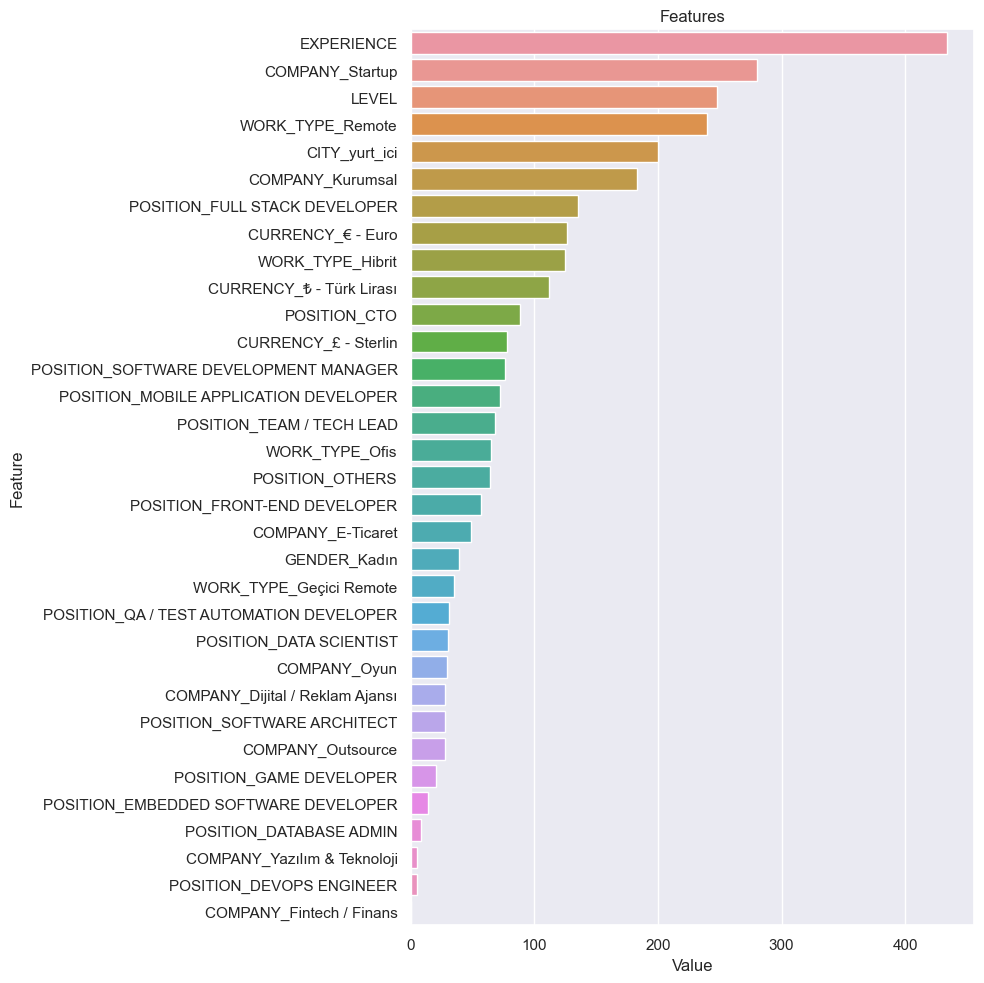

In [30]:
# Degiskenlerin önem düzeyini belirten feature importance
def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

model = LGBMRegressor()
model.fit(X, y)

plot_importance(model, X)

In [31]:
## Train verisi ile model kurup, model başarısını değerlendirelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [34]:
#MODELRMSE DEGERLERİNE BAKALIM
models = [('LR', LinearRegression()),
          #("Ridge", Ridge()),
          #("Lasso", Lasso()),
          #("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]
          # ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 17448.668 (LR) 
RMSE: 21387.5965 (KNN) 
RMSE: 21894.4471 (CART) 
RMSE: 18723.2833 (RF) 
RMSE: 17686.4067 (GBM) 
RMSE: 19869.193 (XGBoost) 
RMSE: 18196.8444 (LightGBM) 


In [83]:
df['SALARY_AVG_TL'].mean()

24195.556307202547

In [84]:
df['SALARY_AVG_TL'].std()

29521.804669966416

In [35]:
# Log dönüşümünün gerçekleştirilmesi
train_df = df[df['SALARY_AVG_TL'].notnull()]
test_df = df[df['SALARY_AVG_TL'].isnull()]

In [36]:
y = np.log1p(train_df['SALARY_AVG_TL'])
X = train_df.drop("SALARY_AVG_TL", axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)


In [38]:
lgbm = LGBMRegressor().fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

y_pred

array([ 9.12315578,  8.97172734, 10.47861807, ...,  8.91113725,
        8.9983543 ,  9.02315711])

In [39]:
# Yapılan LOG dönüşümünün tersinin (inverse'nin) alınması
new_y = np.expm1(y_pred)
new_y

array([ 9164.07900368,  7876.19645403, 35546.24962141, ...,
        7413.08797243,  8088.75966758,  8291.91746569])

In [40]:
new_y_test = np.expm1(y_test)
new_y_test

1343      7499.0
2952      5499.0
184      25499.0
1465     14499.0
1314    121085.0
          ...   
2440      5499.0
2137     10499.0
2326      5499.0
4086      8499.0
695       9499.0
Name: SALARY_AVG_TL, Length: 1006, dtype: float64

In [41]:
np.sqrt(mean_squared_error(new_y_test, new_y))

20082.664894122463

In [102]:
#LGBMRegressor Modelini Kuralım ve 
# hiperparametre optimizasyonlarını gerçekleştirelim

In [42]:
lgbm_model = LGBMRegressor(random_state=46)

In [43]:
rmse = np.mean(np.sqrt(-cross_val_score(lgbm_model, X, y, cv=5, scoring="neg_mean_squared_error")))

In [44]:
rmse

0.3693034856113914

In [45]:
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1500]
               #"colsample_bytree": [0.5, 0.7, 1]
             }

In [46]:
lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True).fit(X, y)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [47]:
final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X, y)


In [48]:
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))

In [49]:
rmse

0.36772960994904347

In [51]:
model = LGBMRegressor()
model.fit(X, y)
predictions = model.predict(df.drop("SALARY_AVG_TL", axis=1))

In [52]:
predictions

array([9.6519143 , 8.88987115, 9.49698082, ..., 9.00886971, 9.8928128 ,
       9.01941078])

In [53]:
y_test

1343     8.922658
2952     8.612503
184     10.146434
1465     9.581904
1314    11.704256
          ...    
2440     8.612503
2137     9.259131
2326     8.612503
4086     9.047821
695      9.159047
Name: SALARY_AVG_TL, Length: 1006, dtype: float64

In [54]:
#Y_TEST VE Y_PRED DEGERLERİMİZİ AYRI BİR DATAFRAME'DE YANYANA GÖRELİM
veri=np.array(y_test)
veri

array([ 8.9226583 ,  8.61250337, 10.14643373, ...,  8.61250337,
        9.04782144,  9.15904708])

In [55]:
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(predictions,columns = ["y_pred"])
dff.head(40)

,y_test,y_pred
0,8.922658,9.651914
1,8.612503,8.889871
2,10.146434,9.496981
3,9.581904,9.091958
4,11.704256,8.972573
5,8.922658,9.791361
6,9.047821,9.181785
7,9.047821,11.383361
8,9.648595,9.598346
9,9.259131,9.891017


In [116]:
df.to_csv("yeni_step_lightGBM_modelli.csv")